# Week 2: Linear Regression

## Training, Validation and Test Split

In [1]:
%%time
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

print(torch.cuda.is_available())

False
CPU times: user 1.76 s, sys: 1.2 s, total: 2.96 s
Wall time: 3.11 s


In [2]:
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    def __init__(self, train=True):
        self.x = torch.arange(-3,3,0.1).view(-1,1)
        self.f = -3*self.x+1
        self.y = self.f+0.1*torch.randn(self.x.size())
        self.len = self.x.shape[0]
        if train:
            self.y[0]=0
            self.y[50:55]=20
        

    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [3]:
train_ds = Data()
val_ds = Data(train=False)

In [4]:
import torch.nn as nn

class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

In [5]:
criterion = nn.MSELoss()

In [7]:
loader = DataLoader(dataset=train_ds, batch_size=1)

In [8]:
epochs = 10
lrs = [0.0001,0.001,0.01,0.1,1]
val_err = torch.zeros(len(lrs))
test_err = torch.zeros(len(lrs))
models = []

In [10]:
from torch import nn, optim

for i, lr in enumerate(lrs):
    model = LR(1,1)
    optimizer = optim.SGD(model.parameters(), lr=lr)

    ## Train phase
    for epoch in range(epochs):
        for x,y in loader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    ## End train phase


    yhat = model(train_ds.x)
    loss = criterion(yhat, train_ds.y)
    test_err[i]=loss.item()

    yhat = model(val_ds.x)
    loss = criterion(yhat, val_ds.y)
    val_err[i] = loss.item()

    models.append(model)

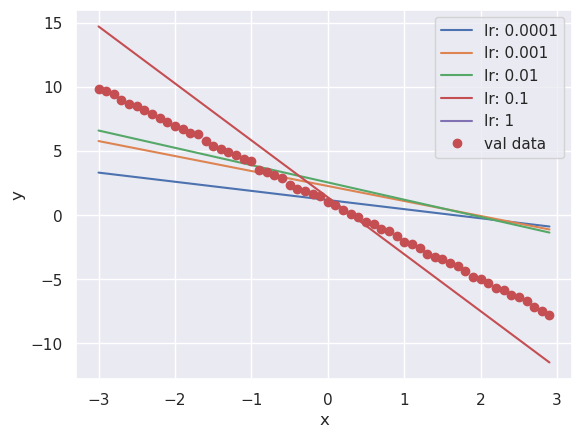

In [11]:
for model, lr in zip(models, lrs):
    yhat = model(val_ds.x)
    plt.plot(val_ds.x.numpy(), yhat.detach().numpy(), label="lr: " + str(lr))

plt.plot(val_ds.x.numpy(), val_ds.y.numpy(), "or", label="val data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()